**HOMEWORK 1**

Assigned: September 02 (3:00PM)

Due: September 16 (11:59PM midnight)

This assignment consists four questions. Two of them require you to generate some Python code.

--

You are expected to:

(1) clone the notebook to your own Google Drive;

(2) enter your answer and code to the cloned notebook directly; and

(3) upload the shareable link of your notebook to Canvas (as your homework submission).
(4) if using JupyterLab Notebook, please upload the ipynb file directly
(5) Alternatively, you can upload pdf of the notebook with all the code and outputs visible

--

**Late submission is only possible within two days, and a deduction of 5% per day will be applied.**

**PROBLEM 1 [30 points]**

**A [20pt].** Use information gain to build a decision tree that predicts the value of the target feature **PLAY** based on the values of other input features such as **ACE**, **TEN**, and **FIRST_MOVE**. Please use the training data provided below and shows the steps of your calculations.

ACE | TEN | FIRST_MOVE | PLAY
----- | ----- | ----- | -----
false | false | false | stand
true | false | true | hit
true | true | false | hit
true | true | true | stand

Suppose that a tree is considered not optimal if there is another tree that achieves the same classification error on the training data but has smaller depth.

**B [5pt].** Is the tree found in the example above optimal? Explain why or why not.

**C [5pt].** If it is not optimal, draw the optimal tree as well. You can draw it by hand on a piece of paper, upload it somewhere with a publicly shareable link and load it on this notebook.

**Note that: if the link is not publicly accessible, the TA will not be able to load it and grade this part of your submission.**


**Answer A:**

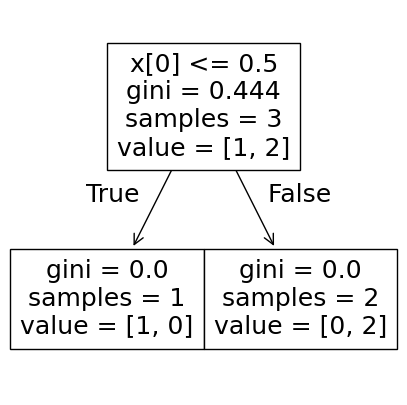

In [1]:
# import required libraries
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

%matplotlib inline

play_df = pd.read_csv("play.csv")

choice = {'stand':0, 'hit':1}
play_df['PLAY'] = play_df['PLAY'].map(choice)

features = ['ACE','TEN','FIRST_MOVE','PLAY']

X = play_df[['ACE','TEN','FIRST_MOVE']].values
y = play_df['PLAY'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=1)

playTree = tree.DecisionTreeClassifier()
playTree = playTree.fit(X_train, y_train) 

# Adjust the figure size before plotting
plt.figure(figsize=(5, 5))  # You can change these values to make the plot larger or smaller

# Plot the decision tree
tree.plot_tree(playTree)
plt.show()

**Answer B:**

It is an optimal tree for it only has 1 layer making it easy to interpret. You can't get more optimal than 1 layer deep tree.

**Answer C:**

Doesn't apply for me.

**PROBLEM 2 [10 points]**

Express the concept **PLAY**=**Hit** learned by all the trees found in **PROBLEM 1** in terms of logical if-then rules.

**ANSWER:**

If ( (ACE=TRUE && TEN=FALSE && FIRST=TRUE) || (ACE=TRUE && TEN=TRUE && FIRST=FALSE) )
    { HIT }
    
Else
    { STAND }

**PROBLEM 3 [30 points]**

**A [10pt].** How does the computational complexity of the $k$-nearest neighbors algorithm grow with the no. of training samples $n$, neighborhood size $k$ and the no. of dimension $d$? Do explain the answer.

**B [20pt].** Fill in the code template below to complete the $k$-nearest neighbors algorithm and its evaluation on the Iris dataset.

In particular, run $10$ evaluations. In each evaluation:

*1.* Randomly partitions the dataset: 80% for train set and 20% for test set.

*2.* Compute the train and test accuracy of KNN with k = 1, 2, ..., 30.

Finally, compute the averaged train and test accuracy of KNN with k = 1, 2, ..., 30 over the above 10 independent evaluations. Plot the train and test accuracy curves. What is the (empirically) best value for k?

**ANSWER:** (provide text answer for PART A and PART B here, fill in necessary code to complete the code block below)

**Part A**


The computation complexity will increase exponentially as n, d, and k increase for the complexity is O(ndk) or O(nd + nk) depending on how your model is implemented.

**Part B**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# K-nearest neighbor implementation

def distance(a, b):
    # both a and b are numpy arrays of shape (d,)
    # fill in the code to compute their Euclidean distance
    
    # sqrt((x_2-x_1)^2 + (y_2-y_1)^2)
    distance = np.linalg.norm(a - b)
    print("Euclidean Distance")
    print("a = " + a)
    print("b = " + b)
    print("distance = " + distance)

    return distance

def update(neighbors_and_distance, x_index, proximity, k = 10):
    # fill in the code to update neighbors_and_distance according to how it is organized (which is also your choice)
    pass # remove this once the code has been filled in

def find_nearest_neighbor(x_test, X, k = 10):
    neighbors_and_distance = []  # decide how to organize this such that it will work in tandem with the update function below -- it does not have to be a list
    for i in range(X.shape[0]):
        x_candidate = X[i]
        proximity = distance(x_candidate, x_test)  # compute the Euclidean distance between two data points
        neighbors_and_distance = update(neighbors_and_distance, i, proximity, k = k)  # this needs to be implemented in tandem with how neighbors_and_distance is organized
    # fill in whatever else necessary here to extract a list of indices corresponding to the k nearest neighbors
    pass # remove this once the code has been filled in

def dominant_label(neighbors, Y):
    # fill in the code to find the dominant label among the neighborhood
    
    pass # remove this once the code has been filled in

def predict(x_test, X, Y, k = 10): # x_test is the test input, X and Y are training input and output respectively
    # X is expected to be a numpy array of shape (n, d), Y is of shape (n,) and x_test is of shape (d,)
    neighbors = find_nearest_neighbor(x_test, X, k = k)  # return a list of indices
    return dominant_label(neighbors, Y)  # return the dominant label among the neighbor

In [3]:
# evaluate K-NN

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from tqdm import tqdm, trange

# evaluation code

def evaluate(X_test, Y_test, X_train, Y_train, k):
    # fill in the code to make prediction at X_test, compare that to Y_test and compute the prediction accuracy
    prediction = predict(X_test, X_train, Y_train, k)
    
    
    pass # return the prediction accuracy

# load iris data

iris = load_iris()
X_all = iris.data
Y_all = iris.target

max_k, n_simulation = 30, 10

test_avg_acc, train_avg_acc = [0] * max_k, [0] * max_k

for i in trange(n_simulation):
    X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state = i * 1000)  # randomly split data
    # fill in the code to compute test_acc and train_acc of KNN using the above train/test partition
    # fill in the code to update the running average in test_avg_acc and train_avg_acc

# fill in the code to plot the test and train accuracy curves against the neighborhood size k

100%|██████████| 10/10 [00:00<00:00, 1600.39it/s]


**PROBLEM 4 [30pts]**

The purpose of this programming assignment is to get you familiar with building decision trees, loading data, and evaluating a classifier's predictive accuracy. To complete the assignment, you will:

(1) load a dataset (5pt);

(2) enhance the decision tree code to specify a depth limit (10pt); and

(3) compare the classification accuracies of a decision tree with no depth limit versus that of a decision tree with a depth limit ( = 1,2, ..., 5) on a random selection of train and test data (10pt); and

(4) answer the questions that reflect on the performance of your classifier (5pt).

--

**Datasets.** Use the attached Tic-Tac-Toe dataset for the assignment. This dataset contains binary classification of tic-tac-toe endgames, classified as "true" if the game is a "win for x". You may use any of the methods we discussed in class or any other method you find available to load the dataset. This dataset contains many instances (one instance per row) and many attributes. For each instance, the target variable is in the last column. The remaining columns represent the input features of the data point.

**Evaluation.** Add code to evaluate the classifier's accuracy. To do this, you will need to randomly split the dataset into training data (the first 700 data points) and testing data (the rest of the data points). Train (build) the decision tree on the training data. Then use the tree to predict the label for each test data point. To compute accuracy, compute (and report) the fraction of test data points that are predicted correctly by the decision tree classifier.

**Prune.** Add the ability to limit the depth of the decision tree.

**Questions.** How did the performance change when you added a depth limit = 1, 2, ..., 5? Why do you think the tree performed differently in this case? Is using the first 700 data points for training and the rest for testing an unbiased mechanism for evaluating performance? Explain.


In [4]:
# Below is a working code of a vanilla decision tree learning with NO depth limit mechanism -- You are supposed to add this mechanism to the code
# Here, we assume discrete features. The stopping condition for tree generation is when all examples have the same class, or there are no more features to split on (in which case, use the majority class).
# If a split yields no examples for a particular feature value, then the classification is based on the parent's majority class.

import math
import numpy as np

class TreeNode:
    def __init__(self, majClass):
        self.split_feature = -1 # -1 indicates leaf node
        self.children = {} # dictionary of {feature_value: child_tree_node}
        self.majority_class = majClass

def build_tree(examples):
    if len(examples) == 0:
        return None
    # collect sets of values for each feature index, based on the examples
    features = {}
    for feature_index in range(len(examples[0]) - 1):
        features[feature_index] = set([example[feature_index] for example in examples])
    return expand(examples, features)

def expand(examples, features):
    tree_node = TreeNode(majority_class(examples))
    # if no examples for this node, then return leaf node predicting majority class
    if len(examples) == 0:
      return tree_node
    # if examples all have same class, then return leaf node predicting this class
    if same_class(examples):
        return tree_node
    # if no more features to split on, then return leaf node predicting majority class
    if not features:
        return tree_node
    # split on best feature and recursively generate children
    best_feature_index = best_feature(features, examples)
    tree_node.split_feature = best_feature_index
    remaining_features = features.copy()
    remaining_features.pop(best_feature_index)
    for feature_value in features[best_feature_index]:
        split_examples = filter_examples(examples, best_feature_index, feature_value)
        tree_node.children[feature_value] = expand(split_examples, remaining_features)
    return tree_node

def majority_class(examples):
    if len(examples) == 0:
      return 'positive'   # hard coded for this dataset
    classes = [example[-1] for example in examples]
    return max(set(classes), key = classes.count)

def same_class(examples):
    classes = [example[-1] for example in examples]
    return (len(set(classes)) == 1)

def best_feature(features, examples):
    # Return index of feature with lowest entropy after split
    best_feature_index = -1
    best_entropy = 2.0 # max entropy = 1.0
    for feature_index in features:
        se = split_entropy(feature_index, features, examples)
        if se < best_entropy:
            best_entropy = se
            best_feature_index = feature_index
    return best_feature_index

def split_entropy(feature_index, features, examples):
    # Return weighted sum of entropy of each subset of examples by feature value.
    se = 0.0
    for feature_value in features[feature_index]:
        split_examples = filter_examples(examples, feature_index, feature_value)
        se += (float(len(split_examples)) / float(len(examples))) * entropy(split_examples)
    return se

def entropy(examples):
    classes = [example[-1] for example in examples]
    classes_set = set(classes)
    class_counts = [classes.count(c) for c in classes_set]
    e = 0.0
    class_sum = sum(class_counts)
    for class_count in class_counts:
        if class_count > 0:
            class_frac = float(class_count) / float(class_sum)
            e += (-1.0)* class_frac * math.log(class_frac, 2.0)
    return e

def filter_examples(examples, feature_index, feature_value):
    # Return subset of examples with given value for given feature index.
    return list(filter(lambda example: example[feature_index] == feature_value, examples))

def print_tree(tree_node, depth = 1):
    indent_space = depth * "  "
    if tree_node.split_feature == -1: # leaf node
        print(indent_space + "class: " + tree_node.majority_class)
    else:
        for feature_value in tree_node.children:
            print(indent_space + "feature " + str(tree_node.split_feature) + " == " + feature_value)
            child_node = tree_node.children[feature_value]
            if child_node:
                print_tree(child_node, depth+1)
            else:
                # no child node for this value, so use majority class of parent (tree_node)
                print(indent_space + "  " + "class" + ": " + tree_node.majority_class)

def classify(tree_node, instance):
    if tree_node.split_feature == -1:
        return tree_node.majority_class
    child_node = tree_node.children[instance[tree_node.split_feature]]
    if child_node:
        return classify(child_node, instance)
    else:
        return tree_node.majority_class

# Now, set up the driving code to evaluate the above decision tree algorithm below

# Fill in code to load data here

# Call build_tree to generate a tree -- you must understand the above code to know what is to be included in "examples" which is passed as input to the build_tree function

# Add code to evaluate the tree

# Once the above are completed. Think about how to modify the above code to limit the depth of the tree.

# Re-generate the tree and evaluate again with limit = 1, 2, 3, 4, 5

In [5]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

**ANSWER:** Provide answers to the questions that reflect on the performance of your classifier here